## Processo Seletivo: Hacker de Fiscalização e Análise de Dados do Gabinete Compartilhado

### Problema:

Crie um arquivo notebook contendo o código (preferencialmente em Python e com comentários) e uma discussão em texto que respondam ao enunciado abaixo.

"Baseado na tabela em CSV com a série histórica 'Remuneração líquida média mensal no Executivo civil federal ativo, por sexo e raça (1999-2020)', disponível no site do Atlas do Estado Brasileiro (IPEA), comente uma ou duas tendências da evolução da remuneração destes servidores de acordo com seu sexo e/ou raça."

### Importando biliotecas necessárias

In [160]:
import os
import csv
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotb inline

UsageError: Line magic function `%matplotb` not found.


### Carregando dados

In [161]:
# Verifica se arquivo contendo dados exite. 
# Caso não exista, faz download no site do IPEA (https://www.ipea.gov.br/atlasestado/arquivos/downloads/5233-liquidosexoraca.csv)
if os.path.isfile('./data/5233-liquidosexoraca.csv'):
    print('Arquivo já exite')
else:
    print('Download do arquivo')
    data_url = 'https://www.ipea.gov.br/atlasestado/arquivos/downloads/5233-liquidosexoraca.csv'
    df = pd.read_csv(data_url, sep=";", encoding='utf-8')
    df.to_csv('./data/5233-liquidosexoraca.csv', index=False, sep=";")

Arquivo já exite


In [162]:
# Carrega dados no dataframe 
df = pd.read_csv('./data/5233-liquidosexoraca.csv', sep=';', index_col=None, usecols=['ano', 'sexo_raça', 'liquido'])
df.head()

,ano,sexo_raça,liquido
0,1999,Homem Branco,"6527,2"
1,1999,Homem Negro,"4768,7"
2,1999,Mulher Branca,"5261,6"
3,1999,Mulher Negra,4010
4,2000,Homem Branco,"5690,3"


### Tratando dados

In [163]:
# Checando tipo dos dados
df.dtypes

ano           int64
sexo_raça    object
liquido      object
dtype: object

In [164]:
# Tratando dados numéricos
df['liquido'] = df['liquido'].astype(str)
df['liquido'] = df['liquido'].str.replace(',', '.')
df['liquido'] = df['liquido'].astype(float)
df.head()

,ano,sexo_raça,liquido
0,1999,Homem Branco,6527.2
1,1999,Homem Negro,4768.7
2,1999,Mulher Branca,5261.6
3,1999,Mulher Negra,4010.0
4,2000,Homem Branco,5690.3


In [165]:
# Checando se conversão deu certo
df.dtypes

ano            int64
sexo_raça     object
liquido      float64
dtype: object

In [166]:
# Tabela ampla ano x grupo
df_pivot = pd.pivot_table(df, index='ano', values='liquido', columns='sexo_raça')
df_pivot

sexo_raça,Homem Branco,Homem Negro,Mulher Branca,Mulher Negra
ano,,,,
1999,6527.2,4768.7,5261.6,4010.0
2000,5690.3,4151.7,4887.3,3782.5
2001,5833.8,4107.2,4997.5,3734.5
2002,6407.0,4489.6,5429.7,4069.7
2003,6133.3,4297.4,5171.9,3856.7
2004,5902.9,4372.2,4963.7,3862.0
2005,6314.4,4558.0,5298.2,4036.4
2006,6227.3,4368.9,5269.9,3958.6
2007,7049.0,4815.0,5822.3,4311.5


In [167]:
# Taxa de crescimento ano a ano, em relação a média total anterior, em relação a própria categoria
# grupos = {'Homem Branco', 'Homem Negro', 'Mulher Branca', 'Mulher Negra'}
# var_col = {'hb_var', 'hn_var', 'mb_var', 'mn_var'}

# for i in grupos:
#     for j in var_col:
#         df_pivot[j] = df_pivot[i].pct_change().round(2)

df_pivot["hb_var"] = df_pivot['Homem Branco'].pct_change().round(2)
df_pivot["hn_var"] = df_pivot['Homem Negro'].pct_change().round(2)
df_pivot["mb_var"] = df_pivot['Mulher Branca'].pct_change().round(2)
df_pivot["mn_var"] = df_pivot['Mulher Negra'].pct_change().round(2)

df_pivot

sexo_raça,Homem Branco,Homem Negro,Mulher Branca,Mulher Negra,hb_var,hn_var,mb_var,mn_var
ano,,,,,,,,
1999,6527.2,4768.7,5261.6,4010.0,NaN,NaN,NaN,NaN
2000,5690.3,4151.7,4887.3,3782.5,-0.13,-0.13,-0.07,-0.06
2001,5833.8,4107.2,4997.5,3734.5,0.03,-0.01,0.02,-0.01
2002,6407.0,4489.6,5429.7,4069.7,0.10,0.09,0.09,0.09
2003,6133.3,4297.4,5171.9,3856.7,-0.04,-0.04,-0.05,-0.05
2004,5902.9,4372.2,4963.7,3862.0,-0.04,0.02,-0.04,0.00
2005,6314.4,4558.0,5298.2,4036.4,0.07,0.04,0.07,0.05
2006,6227.3,4368.9,5269.9,3958.6,-0.01,-0.04,-0.01,-0.02
2007,7049.0,4815.0,5822.3,4311.5,0.13,0.10,0.10,0.09


### Estudando dados

In [168]:
# Maior, menor e salário médio por grupo
grupos = {'Homem Branco', 'Homem Negro', 'Mulher Branca', 'Mulher Negra'}

for i in grupos:
    sel = df.loc[df['sexo_raça'] == i]
    max_sal = max(sel['liquido'])
    ano_max_sal = sel.loc[sel['liquido'] ==  max_sal, 'ano'].values
    min_sal = min(sel['liquido'])
    ano_min_sal = sel.loc[sel['liquido'] ==  min_sal, 'ano'].values
    mean_sal = np.mean(sel['liquido']).round(decimals = 1)
    print("'" + i + "':")
    print('Maior salário: R$ ' + str(max_sal) + ' ' + str(ano_max_sal))
    print('Menor salário: R$ ' + str(min_sal) + ' ' + str(ano_min_sal))
    print('Salário médio: R$ ' + str(mean_sal) + '\n')

'Mulher Negra':
Maior salário: R$ 6335.1 [2014]
Menor salário: R$ 3734.5 [2001]
Salário médio: R$ 5066.8

'Mulher Branca':
Maior salário: R$ 8321.2 [2014]
Menor salário: R$ 4887.3 [2000]
Salário médio: R$ 6718.9

'Homem Branco':
Maior salário: R$ 9279.1 [2014]
Menor salário: R$ 5690.3 [2000]
Salário médio: R$ 7738.2

'Homem Negro':
Maior salário: R$ 6591.9 [2017]
Menor salário: R$ 4107.2 [2001]
Salário médio: R$ 5460.0



In [169]:
# De acordo com infos do IPEA (https://www.ipea.gov.br/atlasestado/consulta/145), valores estão corrigidos para preços de fevereiro de 2020. 
# Então não faz sentido deflacionar

# Não faz sentido separar sexo e raça visto que não temos as ponderações para diferentes agrupamentos. Procuro as proposrções?

# Comparar homem branco com demais categorias

# Verificar variação percentual entre 1999 e 2020 por grupo

# No gráfico
# Linha em 2006 e 2010 para plato, crescimnto e plato

### Plotando gráfico

(3000.0, 10000.0)

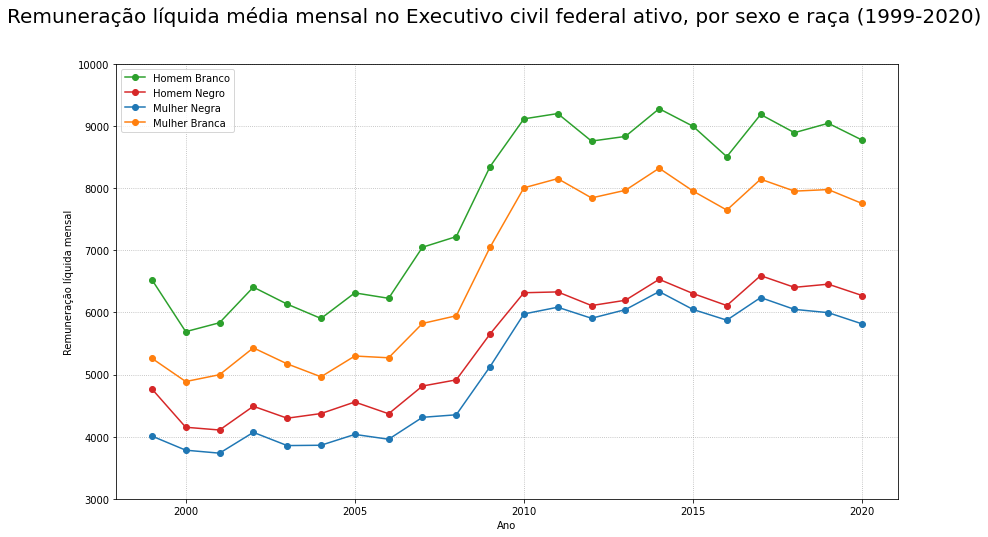

In [170]:
fig, ax = plt.subplots(figsize=(14,8))
plt.suptitle('Remuneração líquida média mensal no Executivo civil federal ativo, por sexo e raça (1999-2020)', size=20)
grupos = {'Homem Branco', 'Homem Negro', 'Mulher Branca', 'Mulher Negra'}

for i in grupos:
    sel = df.loc[df['sexo_raça'] == i]
    x = sel['ano']
    y = sel['liquido']
    plt.plot(x,y, label=i, marker='o')
    # df_pivot[i].rolling(3).mean().plot(linestyle=':')
handles, labels = ax.get_legend_handles_labels()
handles = [handles[2], handles[3], handles[0], handles[1]]
labels = [labels[2], labels[3], labels[0], labels[1]]
plt.legend(handles, labels)
plt.grid(True, linestyle=':')
plt.xlabel('Ano')
plt.ylabel('Remuneração líquida mensal')
plt.ylim(3000,10000)

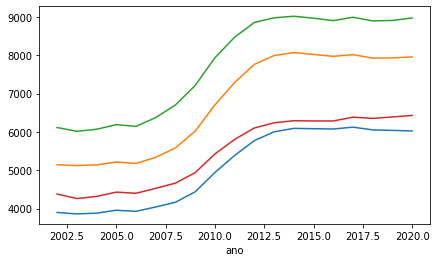

In [171]:
# Verificar tendência suavizada com média móvel de 4 períodos -> nota-se dois platôs 
fig, ax = plt.subplots(figsize=(7,4))
grupos = {'Homem Branco', 'Homem Negro', 'Mulher Branca', 'Mulher Negra'}

for i in grupos:
    df_pivot[i].rolling(4).mean().plot()